In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [0.1, 0.3, 0.7, 1.2, 1.6, 2.2, 2.7, 3.1, 3.5, 3.9],
    [0.558, 0.569, 0.176, -0.207, -0.133, 0.132, 0.055, -0.090, -0.069, 0.027]
]).T

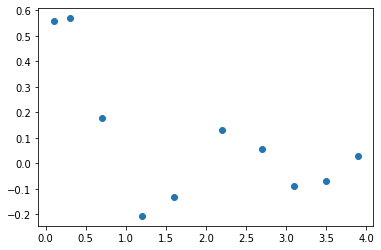

In [4]:
plt.plot(*data.T,'o')

In [5]:
ti = data[:,0]
yi = data[:,1]

In [10]:
def y(t,x):
    A, tau, omega, phi = x
    return A*np.exp(-tau*t)*np.sin(omega*t+phi)

def F(x):
    return y(ti,x)-yi

def dF(x):
    A, tau, omega, phi = x
    return np.array([np.exp(-tau*ti)*np.sin(omega*ti+phi),
                     -ti*A*np.exp(-tau*ti)*np.sin(omega*ti+phi),
                     ti*A*np.exp(-tau*ti)*np.cos(omega*ti+phi),
                     A*np.exp(-tau*ti)*np.cos(omega*ti+phi)]).T


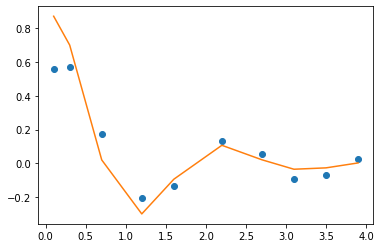

In [11]:
x0 = np.array([1,1,3,1],dtype=float)
plt.plot(*data.T,'o')
plt.plot(ti,y(ti,x0))

In [12]:
from scipy.linalg import solve_triangular

In [15]:
maxIter = 100
tol = 1e-10
x = x0.copy()
for k in range(maxIter):
    A = dF(x)
    b = F(x)
    q,r = np.linalg.qr(A)
    s = solve_triangular(r,q.T@b)
    x += s
    err = np.linalg.norm(dF(x).T@F(x))
    print(k, err)
    if err < tol:
        break


0 0.7455697672470322
1 1.3687529641965246
2 3.9687389278493894
3 15.665559966822652
4 64.18100999462226
5 260.89274530520373
6 1053.0241197905189
7 4232.177086712579
8 16970.08010813016
9 67964.29336790397
10 272026.3582754814
11 1088445.0464129217
12 4354460.65836314
13 17419204.826158136
14 69679544.93792304
15 278723632.2664505
16 1114905435.343646
17 4459643555.178674
18 17838617849.571312
19 71354558657.24695
20 285418409148.15955
21 1141673985632.2302
22 4566696640609.356
23 18266787958599.54
24 73067154626723.6
25 292268624091547.0
26 1169074507535492.8
27 4676298052480585.0
28 1.870519225459956e+16
29 7.48207691077527e+16
30 2.9928307660971955e+17
31 1.1971323067962962e+18
32 4.788529227900022e+18
33 1.9154116913029755e+19
34 7.66164676549784e+19
35 3.064658706256323e+20
36 1.225863482513965e+21
37 4.903453930078736e+21
38 1.961381572036069e+22
39 7.845526288153428e+22
40 3.138210515263201e+23
41 1.2552842061056468e+24
42 5.021136824423315e+24
43 2.0084547297694726e+25
44 8.033